# Importing Necessary Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Collection

In [2]:
data = pd.read_csv(r"E:\Python\PythonDatasets\medical\insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
#Checking for null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.shape

(1338, 7)

In [8]:
data.index

RangeIndex(start=0, stop=1338, step=1)

In [9]:
data.size

9366

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Data Analysis

In [13]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Alpha\AppData\Local\Temp\ipykernel_2164\1084649679.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


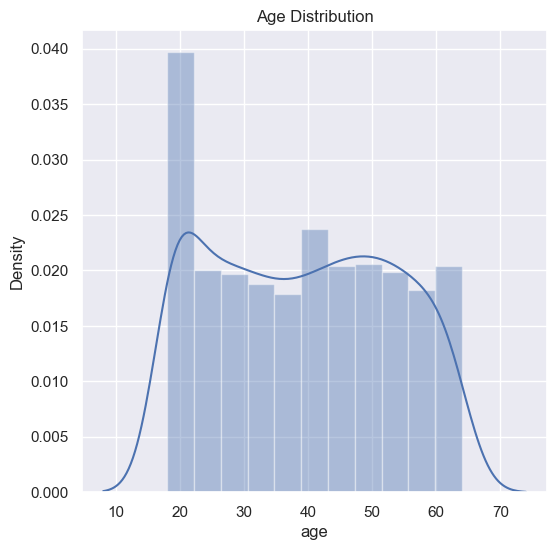

In [17]:
# Distribution of 'age' column
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

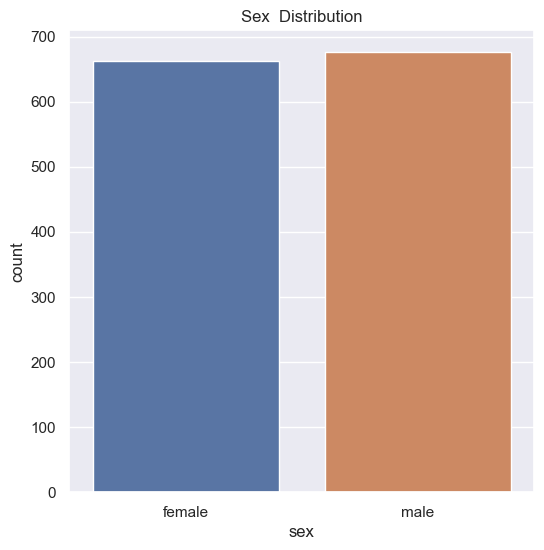

In [21]:
# 'gender' column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=data)
plt.title('Sex  Distribution')
plt.show()

In [22]:
data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\Alpha\AppData\Local\Temp\ipykernel_2164\833511952.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


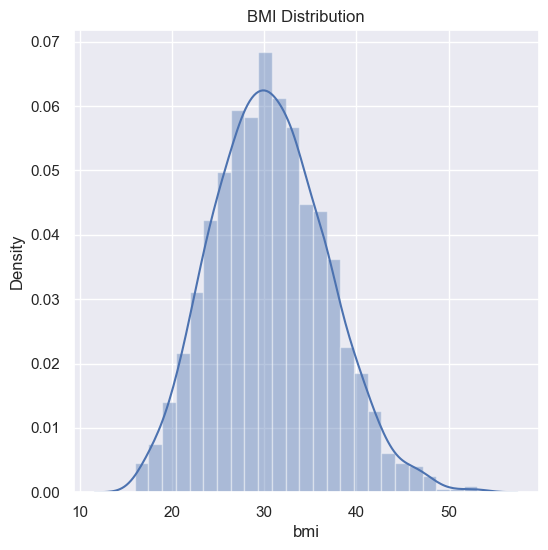

In [25]:
# Distribution of 'bmi' column
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['bmi'])
plt.title('BMI Distribution')
plt.show()

# Normal BMI Range => 18.5 to 25

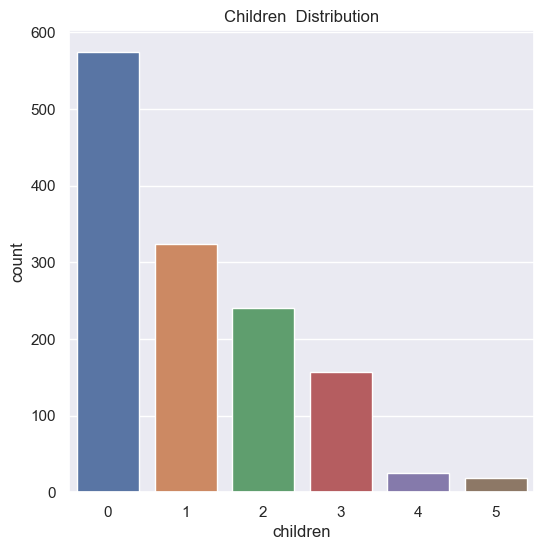

In [26]:
# 'children' column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=data)
plt.title('Children  Distribution')
plt.show()

In [27]:
data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

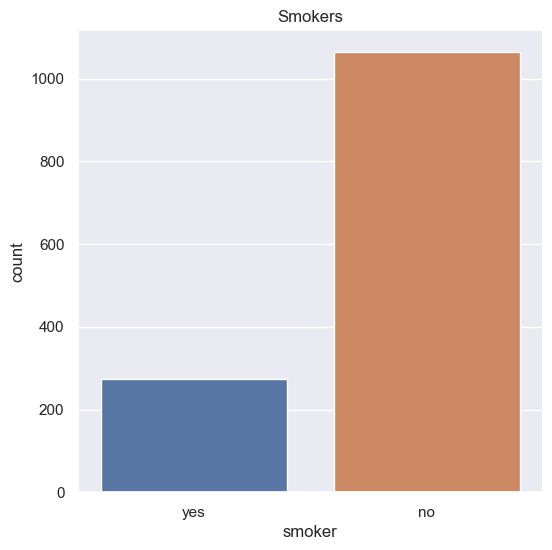

In [31]:
# 'smoker' column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=data)
plt.title('Smokers')
plt.show()

In [32]:
data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

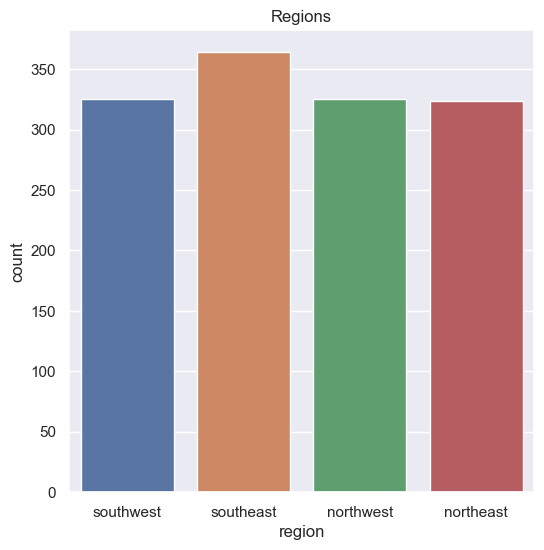

In [33]:
# 'region' column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=data)
plt.title('Regions')
plt.show()

In [35]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


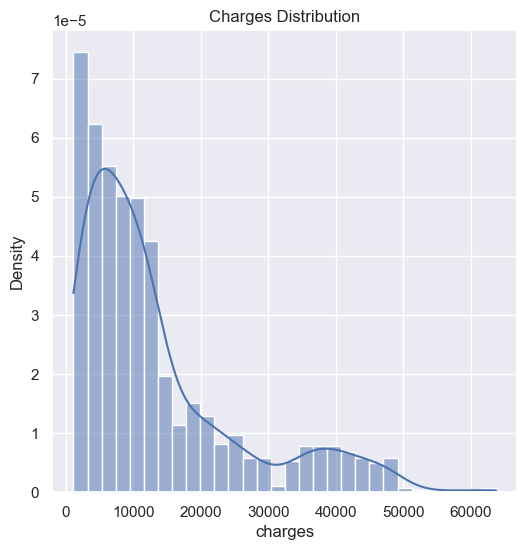

In [39]:
# Distribution of 'charges' column
sns.set()
plt.figure(figsize=(6,6))
#sns.distplot(data['charges'])
sns.histplot(data["charges"], kde=True, stat="density")
plt.title('Charges Distribution')
plt.show()

# Data Pre-processing

In [40]:
#Encoding the categorical features
#encoding 'sex' column
data.replace({'sex':{'male':0, 'female':1}}, inplace=True)

C:\Users\Alpha\AppData\Local\Temp\ipykernel_2164\4241627645.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'sex':{'male':0, 'female':1}}, inplace=True)


In [41]:
#encoding 'smoker' column
data.replace({'smoker':{'yes':1, 'no':0}}, inplace=True)

C:\Users\Alpha\AppData\Local\Temp\ipykernel_2164\3341122323.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'smoker':{'yes':1, 'no':0}}, inplace=True)


In [42]:
#encoding 'region' column
data.replace({'region':{'southeast':0 , 'southwest': 1, 'northeast':2 ,'northwest':3}}, inplace=True)

C:\Users\Alpha\AppData\Local\Temp\ipykernel_2164\2871649964.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'region':{'southeast':0 , 'southwest': 1, 'northeast':2 ,'northwest':3}}, inplace=True)


In [43]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,2,2205.98080
1335,18,1,36.850,0,0,0,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


# Splitting Data into Training and Testing

In [45]:
#splitting the features and Target
x = data.drop(columns='charges', axis=1)
y = data['charges']

In [46]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [51]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [52]:
#Splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [53]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Linear Regression

In [54]:
regressor = LinearRegression()

In [55]:
regressor.fit(x_train, y_train)

LinearRegression()

# Model Evaulation

In [57]:
#Prediction on training data
training_data_prediction = regressor.predict(x_train)
training_data_prediction

array([  478.49404197,  9317.75369733, 13193.79859142, ...,
       17327.55442479,  9600.51860822, 13753.18970971])

In [59]:
# Calculating R-Squared value(ranges between 0 to 1)
#Comparing y_train values with the y_values predicted from the model
r2_train = metrics.r2_score(y_train, training_data_prediction)
print("R squared value: ", r2_train)

R squared value:  0.751505643411174


In [60]:
#Prediction on test_data
testing_data_prediction = regressor.predict(x_test)
testing_data_prediction

array([ 1520.59242161, 11570.5920178 , 10082.43849883,  2246.21754312,
        7881.28362035, 11081.50227956,  3538.24791808,   698.03224036,
       12223.4851558 ,  9611.93217623, 11657.51046259,  4891.0539656 ,
       29947.50192274,  -370.8384887 , 12401.36048618, 13243.21522903,
        3814.42216541,  7883.39384825, 29431.34485576,  2362.83672121,
       12505.50452609,  2256.75277238, 34468.01948464, 31742.4859866 ,
       30306.19118561,  9027.76110059,  1923.87420399, 15247.09503907,
        6542.61302531,  2104.79910554,  9484.36642532,  5794.91649267,
        4425.26853454,  5015.3811241 ,  9579.4545934 ,  4601.74838962,
       29875.58083252,  6797.04084444, 27239.25811383, 13999.0938259 ,
         313.55184653, 28415.75044713,  7886.54751277,  1478.09056648,
       10273.28966107,  8003.09003405, 11612.15283896,  8175.95966058,
       10753.45200738, 13802.18082647,  5740.90172027,  -737.13333209,
       26346.21771217, 37192.66032995,  7364.09646118, 17845.51752284,
      

In [61]:
r2_test = metrics.r2_score(y_test, testing_data_prediction)
print("R squared value: ", r2_test)

R squared value:  0.7447273869684076


# Building a Predictive System

In [71]:
input_data = (31,1,25.74,0,0,0)

#Changing input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping this array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print("The Insurance Cost is USD ", prediction[0])

The Insurance Cost is USD  3760.0805764960496


E:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
